In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba2k20-player-dataset/nba2k-full.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


In [3]:
df=pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [4]:
df.shape

(464, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [6]:
df=df.dropna()


In [7]:
df.isnull().sum().sum()

0

In [8]:
df=df.drop(['full_name','b_day','height','weight','college'],axis=1)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15,NBA2k20
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2,NBA2k20
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3,NBA2k20
5,95,#30,Golden State Warriors,G,$40231758,USA,2009,1,7,NBA2k20
6,94,#3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1,NBA2k20


In [9]:
def removehash(value):
    value=value[1:]
    return int(value)
df['jersey']=df['jersey'].apply(removehash)

In [10]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,$40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1,NBA2k20


In [11]:
df['salary']=df['salary'].apply(removehash)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1,NBA2k20


In [12]:
df['team'].unique

<bound method Series.unique of 1       Los Angeles Clippers
3              Brooklyn Nets
4            Houston Rockets
5      Golden State Warriors
6         Los Angeles Lakers
               ...          
457          Toronto Raptors
458                Utah Jazz
459    Oklahoma City Thunder
460       Washington Wizards
462          Toronto Raptors
Name: team, Length: 369, dtype: object>

In [13]:
df['team'].value_counts()

team
Brooklyn Nets             17
Los Angeles Clippers      15
Los Angeles Lakers        15
Indiana Pacers            14
Milwaukee Bucks           14
Philadelphia 76ers        14
Orlando Magic             14
New Orleans Pelicans      14
New York Knicks           13
Chicago Bulls             13
Toronto Raptors           13
Minnesota Timberwolves    13
Houston Rockets           13
Memphis Grizzlies         12
Detroit Pistons           12
Sacramento Kings          12
Phoenix Suns              12
Miami Heat                12
San Antonio Spurs         12
Atlanta Hawks             12
Denver Nuggets            12
Golden State Warriors     11
Dallas Mavericks          11
Boston Celtics            11
Portland Trail Blazers    11
Washington Wizards        11
Oklahoma City Thunder     10
Cleveland Cavaliers       10
Utah Jazz                  9
Charlotte Hornets          7
Name: count, dtype: int64

In [14]:
def removecountryoutlier(value):
    if value not in ['USA','Canada','Australia']:
        return 'Others'
    else:
        return value
df['country']=df['country'].apply(removecountryoutlier)
df['country'].value_counts()

country
USA          315
Others        31
Canada        15
Australia      8
Name: count, dtype: int64

In [15]:
df['position'].value_counts()

position
G      166
F      123
C       31
F-C     26
G-F     11
F-G      7
C-F      5
Name: count, dtype: int64

In [16]:
def removeundrafted(value):
    if value=='Undrafted':
        return
    else:
        return value
df['draft_round']=df['draft_round'].apply(removeundrafted)
df['draft_peak']=df['draft_peak'].apply(removeundrafted)

In [17]:
df=df.dropna()

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['position']=le.fit_transform(df['position'])
df['country']=le.fit_transform(df['country'])
df['team']=le.fit_transform(df['team'])
df=df.drop(['version'],axis=1)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,12,2,32742000,3,2011,1,15
3,96,7,2,2,37199000,3,2007,1,2
4,96,13,10,5,38199000,3,2009,1,3
5,95,30,9,5,40231758,3,2009,1,7
6,94,3,13,3,27093019,3,2012,1,1


In [19]:
df.describe()

,rating,jersey,team,position,salary,country,draft_year
count,317.000000,317.000000,317.000000,317.000000,3.170000e+02,317.000000,317.000000
mean,78.337539,13.839117,14.665615,3.362776,1.145762e+07,2.782334,2014.066246
std,6.820688,14.861682,8.431886,1.742326,1.178645e+07,0.589950,3.915891
min,68.000000,0.000000,0.000000,0.000000,7.956800e+04,0.000000,2003.000000
25%,73.000000,3.000000,8.000000,2.000000,2.351838e+06,3.000000,2011.000000
50%,77.000000,10.000000,15.000000,3.000000,6.500000e+06,3.000000,2015.000000
75%,82.000000,22.000000,22.000000,5.000000,1.564375e+07,3.000000,2017.000000
max,97.000000,99.000000,29.000000,6.000000,4.578097e+07,3.000000,2019.000000


In [20]:
x=df.drop(['salary'],axis=1)
y=df['salary']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)


/tmp/ipykernel_33/1028553671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary', ylabel='Density'>

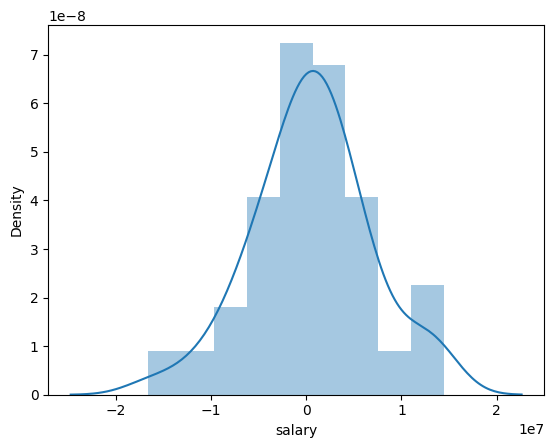

In [22]:
diff=y_test-predictions
import seaborn as sns
sns.distplot(diff)

In [23]:
import pickle
pickle.dump(lr,open('./model.sav','wb'))